<a href="https://colab.research.google.com/github/poo5zan/realized-volatility/blob/main/Realized_Volatility_Pujan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# code are adapted from the book, Machine Learning for Financial Risk Management

In [ ]:
import pandas as pd

df = pd.read_csv('/Users/pujanmaharjan/uni adelaide/uofa_research_project/data-cache/df_train_time_ordered.csv')

In [3]:
df

,Unnamed: 0,stock_id,time_id,target,book.seconds_in_bucket.count,book.wap1.sum,book.wap1.mean,book.wap1.std,book.wap2.sum,book.wap2.mean,...,book.log_return1.realized_volatility_nn3_time_price_m_mean_rank,book.log_return1.realized_volatility_nn5_time_price_m_mean_rank,book.log_return1.realized_volatility_nn10_time_price_m_mean_rank,book.log_return1.realized_volatility_nn20_time_price_m_mean_rank,book.log_return1.realized_volatility_nn40_time_price_m_mean_rank,realized_volatility_roll3_by_book.total_volume.mean,realized_volatility_roll10_by_book.total_volume.mean,stock_id_emb0,stock_id_emb1,stock_id_emb2
0,0,0,4294,0.003267,184.0,185.004046,1.005457,0.001293,184.996116,1.005414,...,77.0,71.0,71.0,64.0,65.0,0.004291,0.004026,0.000336,0.000336,0.999327
1,1,1,4294,0.006736,255.0,255.889389,1.003488,0.002718,255.896042,1.003514,...,87.0,87.0,88.0,82.0,79.0,0.005576,0.006540,0.000593,0.000593,0.998813
2,2,2,4294,0.002692,440.0,439.925781,0.999831,0.001008,439.918671,0.999815,...,33.0,37.0,38.0,33.0,28.0,0.013553,0.006793,0.002175,0.002175,0.995650
3,3,3,4294,0.006274,253.0,254.154037,1.004561,0.001713,254.069275,1.004226,...,98.0,105.0,100.0,99.0,94.0,0.012588,0.010415,0.002146,0.002146,0.995708
4,4,4,4294,0.004831,191.0,191.339386,1.001777,0.001505,191.348877,1.001827,...,69.0,78.0,86.0,85.0,87.0,0.004357,0.004948,0.000298,0.000298,0.999403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,428927,122,29316,0.002862,541.0,541.669067,1.001237,0.000507,541.658020,1.001216,...,81.0,84.0,83.0,85.0,82.0,0.002410,0.003350,0.000713,0.000713,0.998574
428928,428928,123,29316,0.001501,515.0,515.976440,1.001896,0.000481,515.985596,1.001914,...,28.0,27.0,21.0,18.0,23.0,0.002123,0.002614,0.002008,0.002008,0.995984
428929,428929,124,29316,0.002569,598.0,598.359070,1.000600,0.000633,598.368835,1.000617,...,48.0,50.0,51.0,54.0,57.0,0.003050,0.005219,0.001420,0.001420,0.997161
428930,428930,125,29316,0.001089,518.0,518.044495,1.000086,0.000345,518.050720,1.000098,...,3.0,4.0,3.0,3.0,3.0,0.001361,0.001735,0.000800,0.000800,0.998400


In [5]:
df['stock_id'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  47,  48,  50,  51,  52,  53,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  72,  73,
        74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 122, 123, 124, 125, 126])

In [6]:
df_stock = df[df['stock_id'] == 0]
df_stock

,Unnamed: 0,stock_id,time_id,target,book.seconds_in_bucket.count,book.wap1.sum,book.wap1.mean,book.wap1.std,book.wap2.sum,book.wap2.mean,...,book.log_return1.realized_volatility_nn3_time_price_m_mean_rank,book.log_return1.realized_volatility_nn5_time_price_m_mean_rank,book.log_return1.realized_volatility_nn10_time_price_m_mean_rank,book.log_return1.realized_volatility_nn20_time_price_m_mean_rank,book.log_return1.realized_volatility_nn40_time_price_m_mean_rank,realized_volatility_roll3_by_book.total_volume.mean,realized_volatility_roll10_by_book.total_volume.mean,stock_id_emb0,stock_id_emb1,stock_id_emb2
0,0,0,4294,0.003267,184.0,185.004046,1.005457,0.001293,184.996116,1.005414,...,77.0,71.0,71.0,64.0,65.0,0.004291,0.004026,0.000336,0.000336,0.999327
112,112,0,24033,0.002580,341.0,340.516826,0.998583,0.000713,340.519624,0.998591,...,72.0,68.0,65.0,65.0,62.0,0.005266,0.003920,0.000336,0.000336,0.999327
224,224,0,5666,0.002051,295.0,294.704533,0.998998,0.000390,294.708897,0.999013,...,72.0,68.0,65.0,59.0,62.0,0.006033,0.004681,0.000336,0.000336,0.999327
336,336,0,29740,0.002364,206.0,206.123983,1.000602,0.000386,206.132851,1.000645,...,66.0,60.0,65.0,59.0,62.0,0.002169,0.003447,0.000336,0.000336,0.999327
448,448,0,22178,0.001439,240.0,239.603879,0.998349,0.000831,239.602212,0.998343,...,56.0,59.0,64.0,58.0,62.0,0.003640,0.002904,0.000336,0.000336,0.999327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428372,428372,0,24913,0.002402,175.0,175.679981,1.003886,0.000377,175.668721,1.003821,...,44.0,43.0,45.0,47.0,46.0,0.002156,0.003008,0.000336,0.000336,0.999327
428484,428484,0,32195,0.002311,308.0,307.699095,0.999023,0.000641,307.704473,0.999040,...,39.0,43.0,45.0,47.0,46.0,0.006333,0.006114,0.000336,0.000336,0.999327
428596,428596,0,15365,0.002017,185.0,185.384277,1.002077,0.000612,185.380768,1.002058,...,43.0,46.0,45.0,48.0,46.0,0.005765,0.003938,0.000336,0.000336,0.999327
428708,428708,0,10890,0.003475,283.0,282.783980,0.999237,0.000667,282.782871,0.999233,...,44.0,43.0,45.0,48.0,46.0,0.003065,0.002893,0.000336,0.000336,0.999327


In [7]:

df_targets = df_stock['target']
df_targets

0         0.003267
112       0.002580
224       0.002051
336       0.002364
448       0.001439
            ...   
428372    0.002402
428484    0.002311
428596    0.002017
428708    0.003475
428820    0.002846
Name: target, Length: 3830, dtype: float64

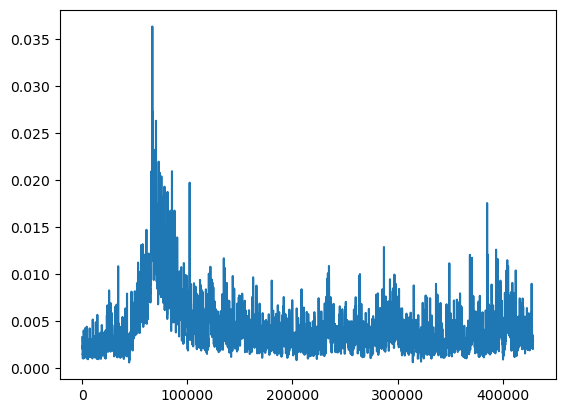

In [8]:
import matplotlib.pyplot as plt

plt.plot(df_targets)

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

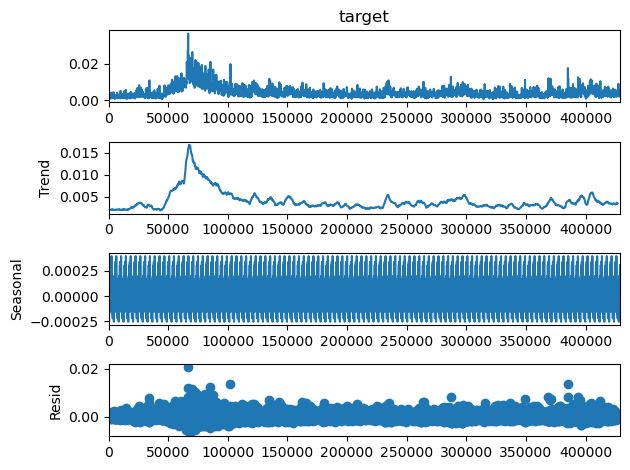

In [10]:
seasonal_decompose(df_targets, period=36).plot()
plt.show()

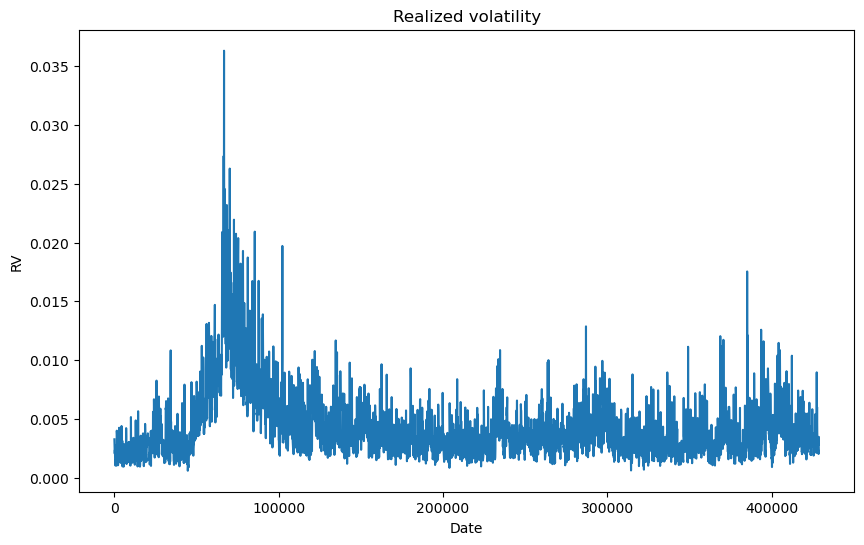

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(df_targets[-200:])
plt.plot(df_targets)
plt.title('Realized volatility')
plt.ylabel('RV')
plt.xlabel('Date')
plt.show()

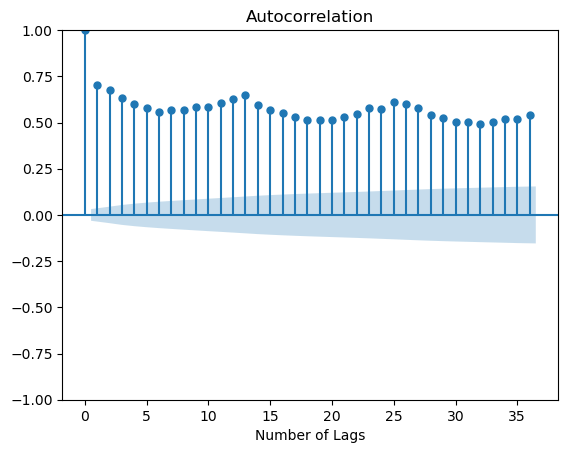

In [15]:
sm.graphics.tsa.plot_acf(df_targets, lags=36)
plt.xlabel('Number of Lags')
plt.show()

/Users/pujanmaharjan/anaconda/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


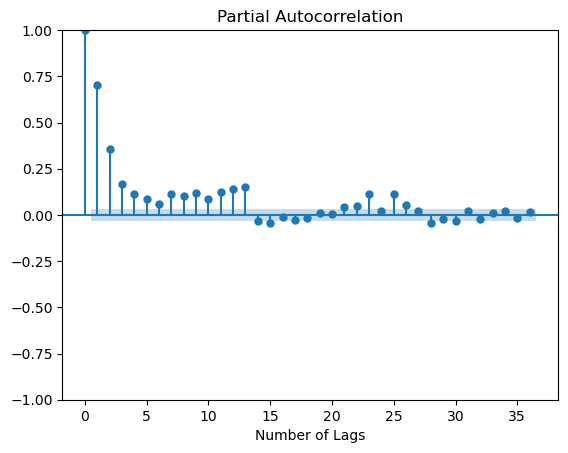

In [16]:
sm.graphics.tsa.plot_pacf(df_targets, lags=36)
plt.xlabel('Number of Lags')
plt.show()

In [19]:
stat_test = adfuller(df_targets)[0:2]
print("The test statistic and p-value of ADF test are {}".format(stat_test))

The test statistic and p-value of ADF test are (-3.245676098939084, 0.017488398255424305)


In [21]:
diff_df_targets = df_targets.diff()
diff_df_targets

0              NaN
112      -0.000687
224      -0.000529
336       0.000314
448      -0.000926
            ...   
428372   -0.000483
428484   -0.000092
428596   -0.000294
428708    0.001458
428820   -0.000629
Name: target, Length: 3830, dtype: float64

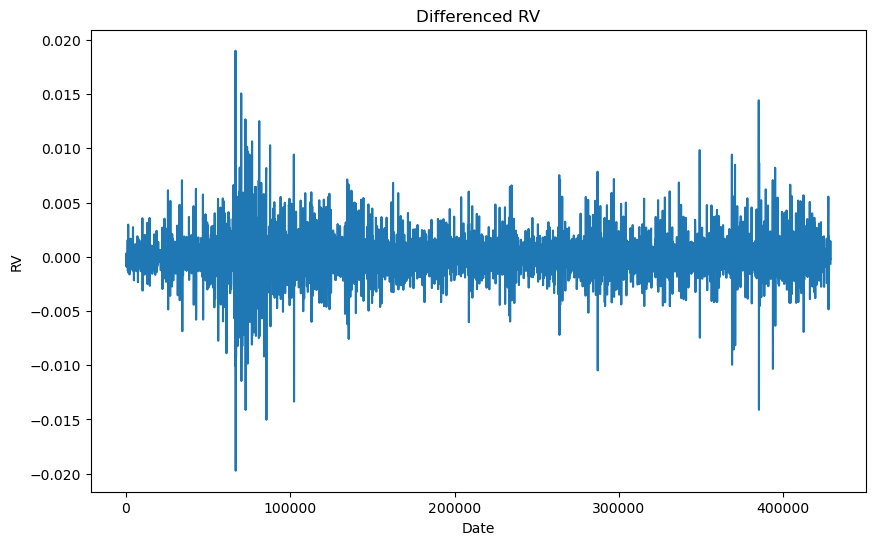

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(diff_df_targets)
plt.title('Differenced RV')
plt.ylabel('RV')
plt.xlabel('Date')
plt.show()

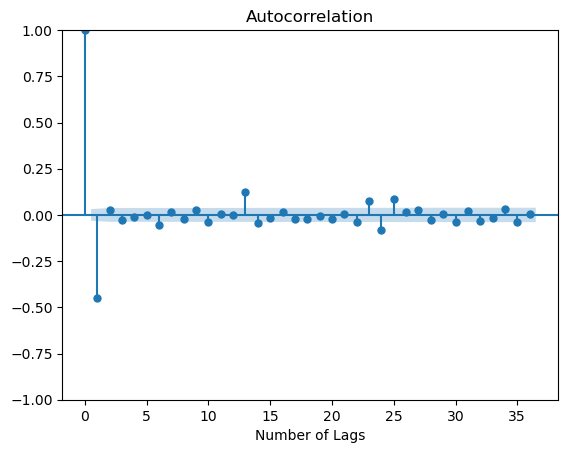

The test statistic and p-value of ADF test after differencing are  (-16.255431641269784, 3.610071645384922e-29)


In [27]:
sm.graphics.tsa.plot_acf(diff_df_targets.dropna(),lags=36)
plt.xlabel('Number of Lags')
plt.show()
stat_test2 = adfuller(diff_df_targets.dropna())[0:2]
# print('stat_test2 ',stat_test2)
print("The test statistic and p-value of ADF test after differencing are ", format(stat_test2))

In [ ]:
# pip install git+https://github.com/RJT1990/pyflux


In [47]:
import pandas as pd
df = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=1min&outputsize=full&apikey=Y36N854DH9B8SL3O&datatype=csv&month=2023-01")
df

,timestamp,open,high,low,close,volume
0,2023-01-31 19:57:00,131.110,131.120,131.072,131.085,100
1,2023-01-31 19:56:00,131.100,131.120,131.063,131.085,286
2,2023-01-31 19:40:00,130.896,130.905,130.858,130.871,174
3,2023-01-31 19:10:00,131.130,131.139,131.092,131.104,148
4,2023-01-31 18:59:00,131.139,131.149,131.102,131.114,500
...,...,...,...,...,...,...
8733,2023-01-03 08:00:00,137.670,137.680,137.630,137.643,503
8734,2023-01-03 07:55:00,137.670,137.680,137.630,137.643,200
8735,2023-01-03 05:23:00,138.157,138.167,138.117,138.130,200
8736,2023-01-03 04:48:00,138.089,138.099,138.049,138.062,100


In [73]:
year_start = 2000
months = [str(x).zfill(2) for x in range(1,12)]
from datetime import date
today = date.today()
today_date = datetime.date(today.year, today.month,1)
print('today_date ', today_date)
print("Today's date:", today)

import datetime

x = datetime.date(2020, 5,1)

print(x)

today_date  2023-07-01
Today's date: 2023-07-10
2020-05-01


In [71]:
import datetime
from dateutil.relativedelta import relativedelta
    
def get_year_month(date_obj):
    return str(date_obj.year) + "-" + str(start_date.month).zfill(2) 
start_date = datetime.date(2000,1,1)

print('year month ', get_year_month(start_date))
today = datetime.date.today()

while start_date <= today:
    start_date_year_month = get_year_month(start_date)
    print('start_date_year_month ', start_date_year_month)
    start_date = start_date + relativedelta(months=1)

# print('date_after_month ', date_after_month)

year month  2000-01
start_date_year_month  2000-01
start_date_year_month  2000-02
start_date_year_month  2000-03
start_date_year_month  2000-04
start_date_year_month  2000-05
start_date_year_month  2000-06
start_date_year_month  2000-07
start_date_year_month  2000-08
start_date_year_month  2000-09
start_date_year_month  2000-10
start_date_year_month  2000-11
start_date_year_month  2000-12
start_date_year_month  2001-01
start_date_year_month  2001-02
start_date_year_month  2001-03
start_date_year_month  2001-04
start_date_year_month  2001-05
start_date_year_month  2001-06
start_date_year_month  2001-07
start_date_year_month  2001-08
start_date_year_month  2001-09
start_date_year_month  2001-10
start_date_year_month  2001-11
start_date_year_month  2001-12
start_date_year_month  2002-01
start_date_year_month  2002-02
start_date_year_month  2002-03
start_date_year_month  2002-04
start_date_year_month  2002-05
start_date_year_month  2002-06
start_date_year_month  2002-07
start_date_year_mon

Today:  10/07/2023
After Month: 10/08/2023
